# Framingham heart disease dataset

We want to generate a prototypical example of a pipeline, where we are predicting 10year chronic heart disease data with patient physicochemical features. This is essentially a classification problem where the target variable (TenYearCHD) is of binary class (catagorical variable converted into a dummy numerical i.e. 0 and 1; these could also have been graded into multiple bins)

## Data loading and exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing the dataset as a csv
df_framingham=pd.read_csv('framingham.csv')

In [4]:
df_framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df=df_framingham.copy()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
#importing the packages from sklearn machine learning package

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [7]:
# These are some of the regression models that are to be tried

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


All the values are numerical. Pretty good starting point

In [9]:
df.shape

(4240, 16)

In [10]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


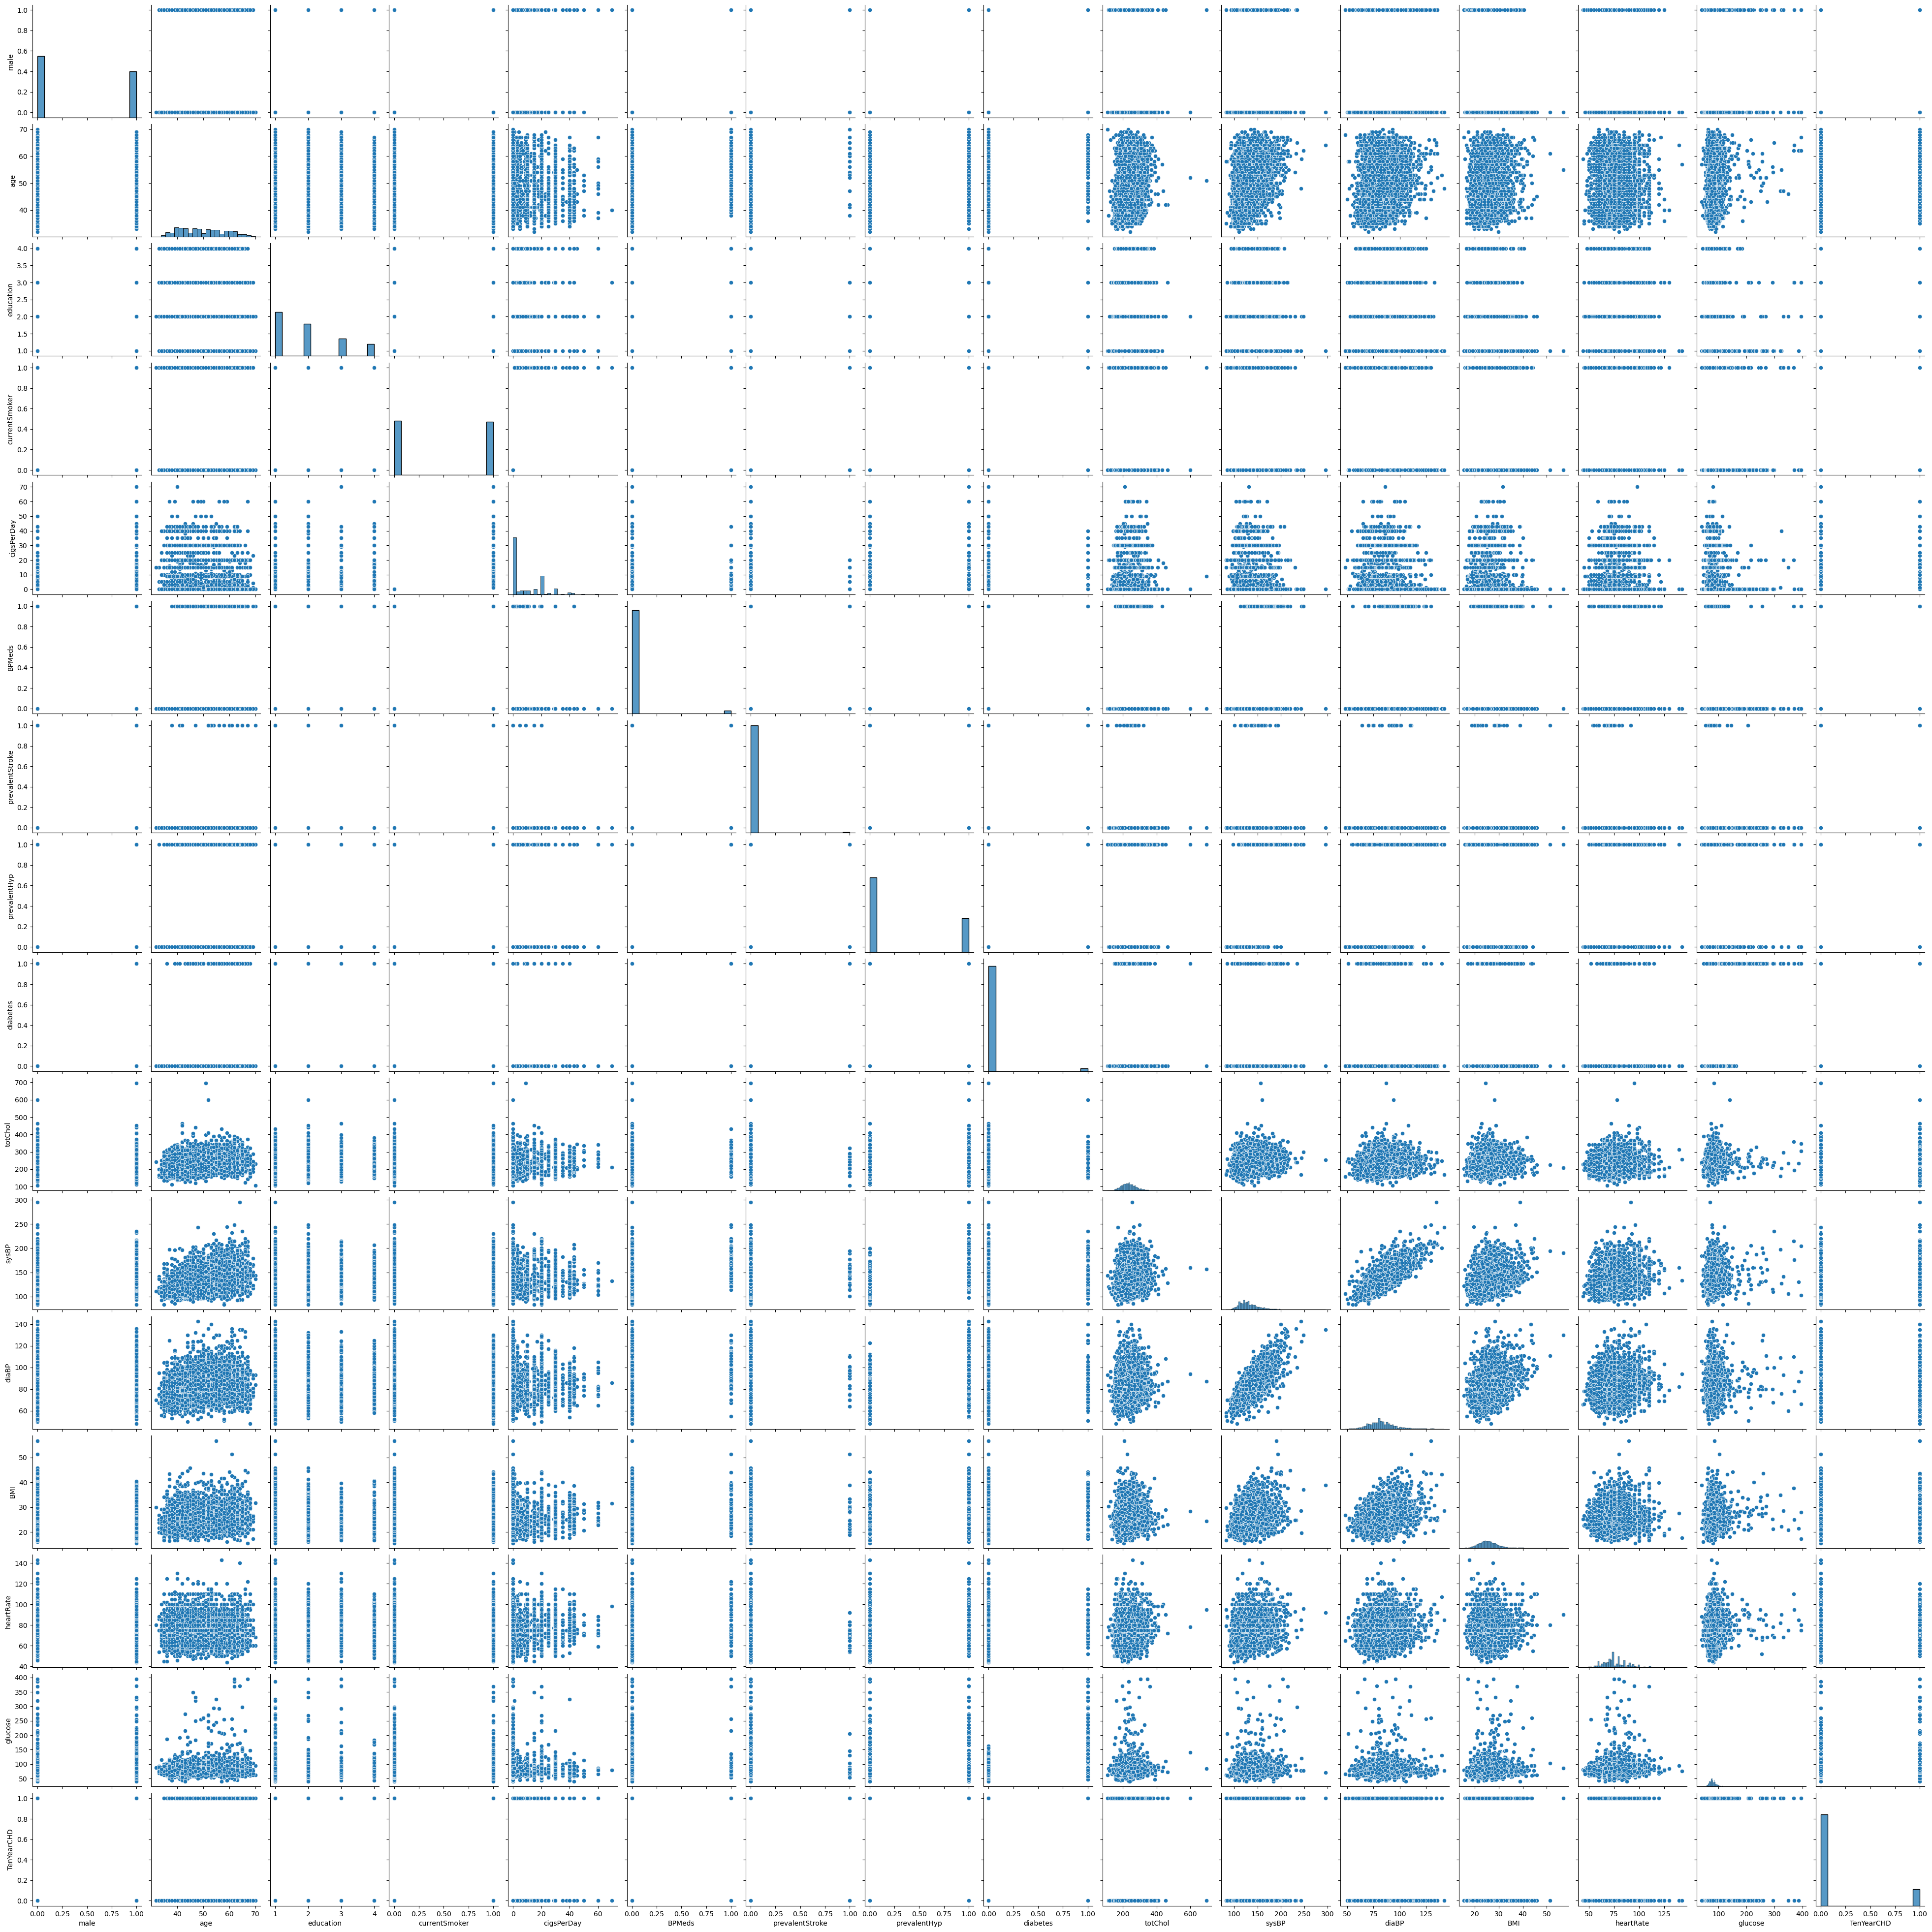

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
#count of the catagorical variable
categorical_var= ['male', 'age', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
categorical_var

['male',
 'age',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

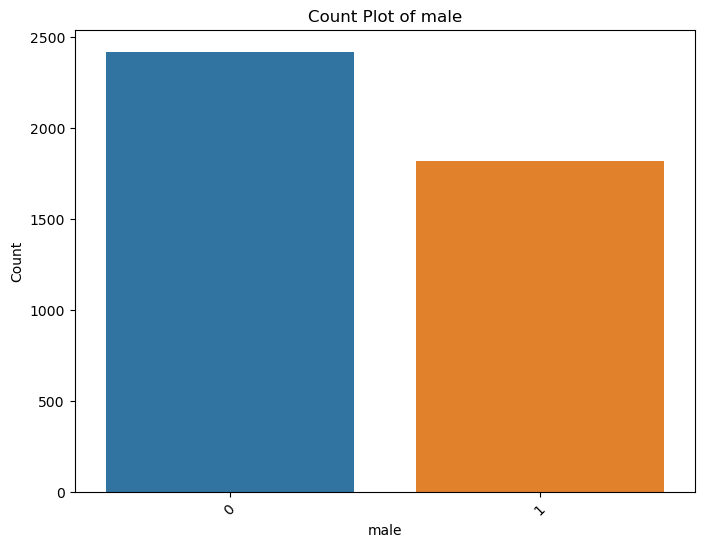

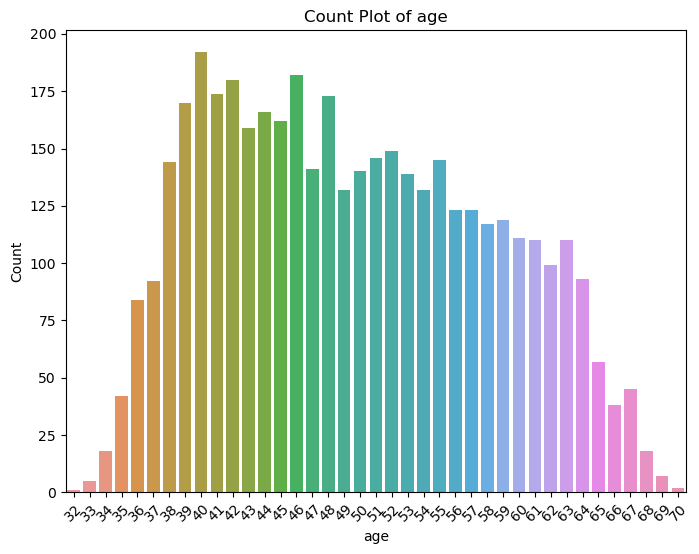

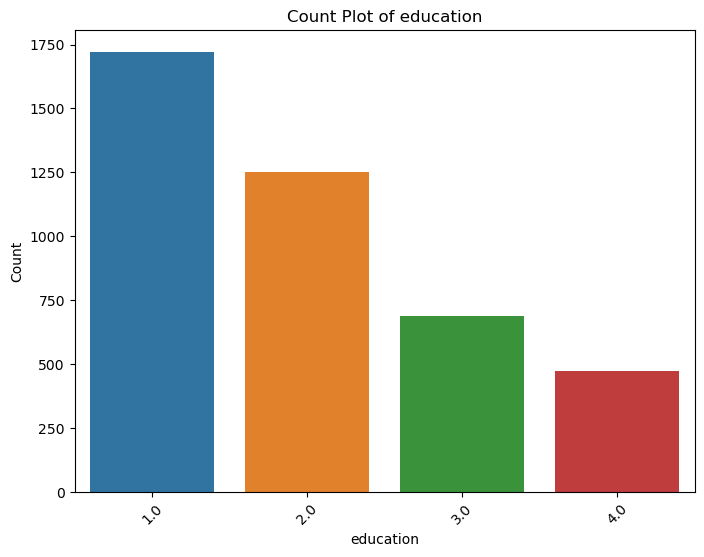

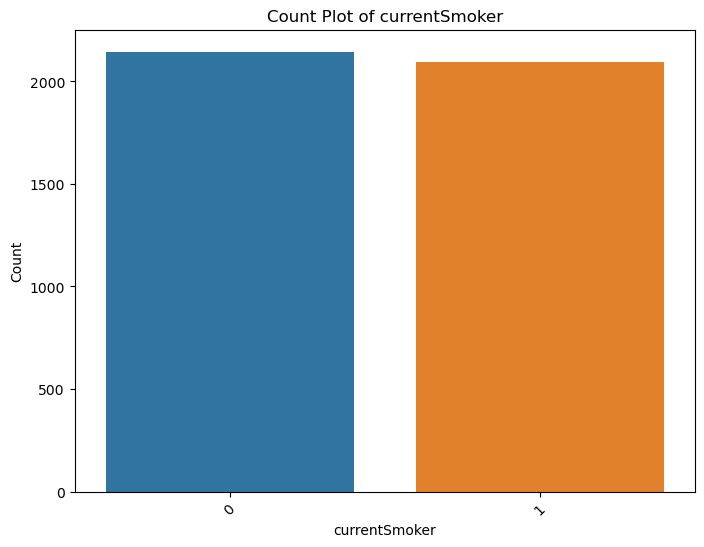

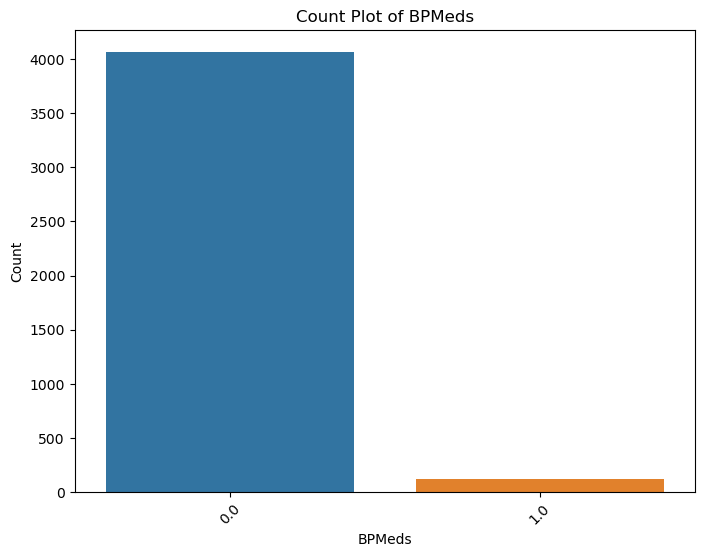

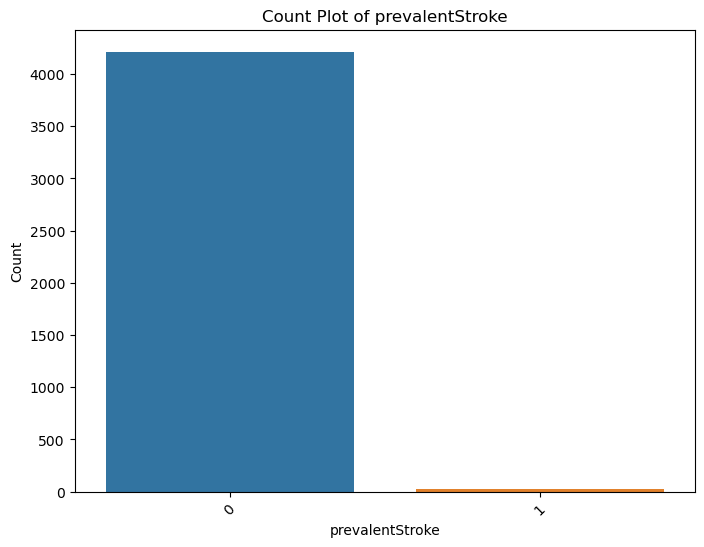

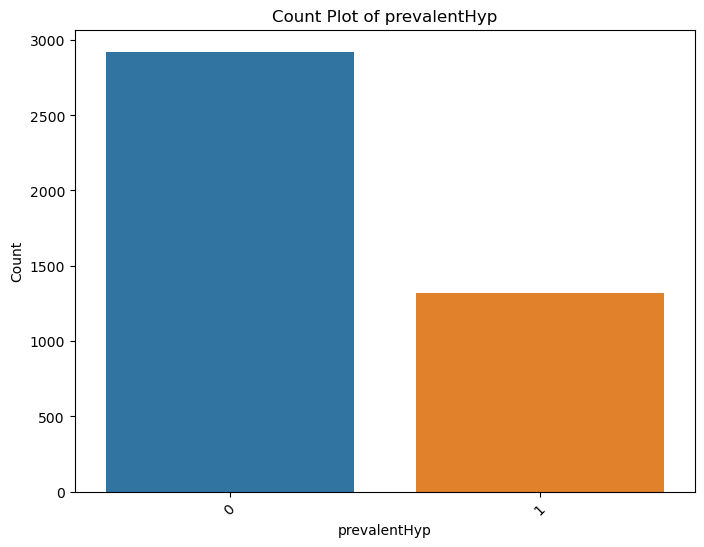

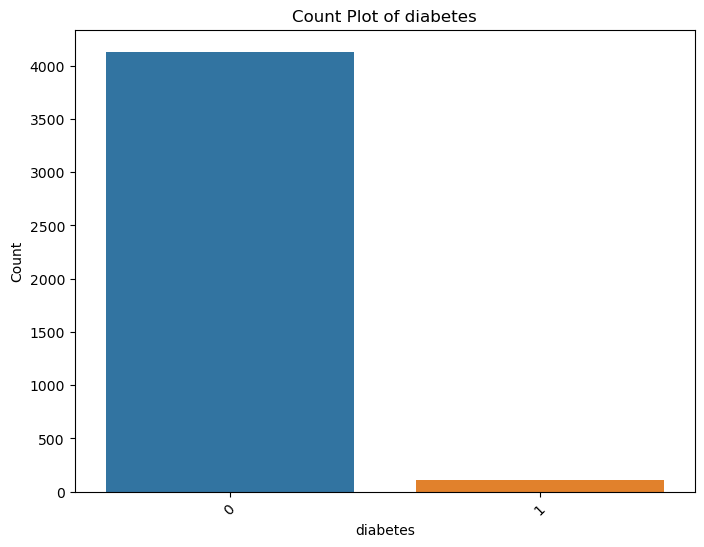

In [13]:
for var in categorical_var:
    plt.figure(figsize=(8, 6))  # Optional: Set the figure size
    sns.countplot(x=var, data=df)
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
    plt.show()

In [13]:
numerical_var= ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
numerical_var

['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

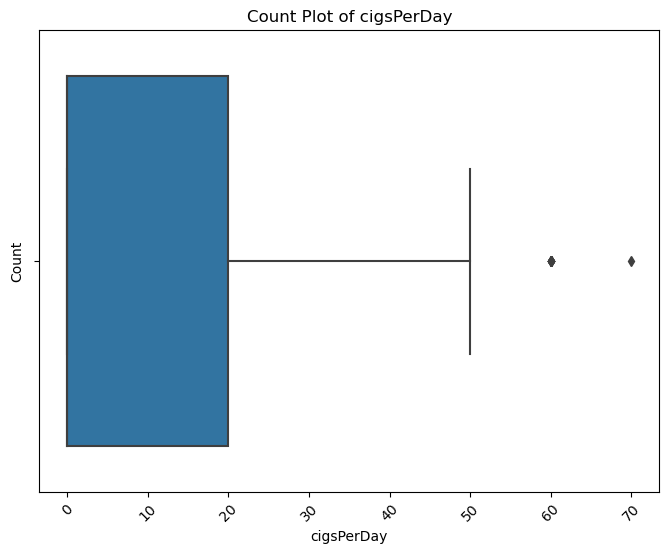

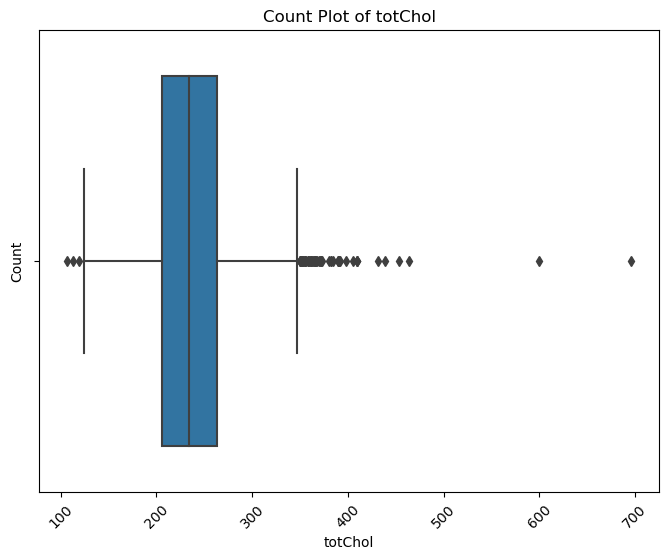

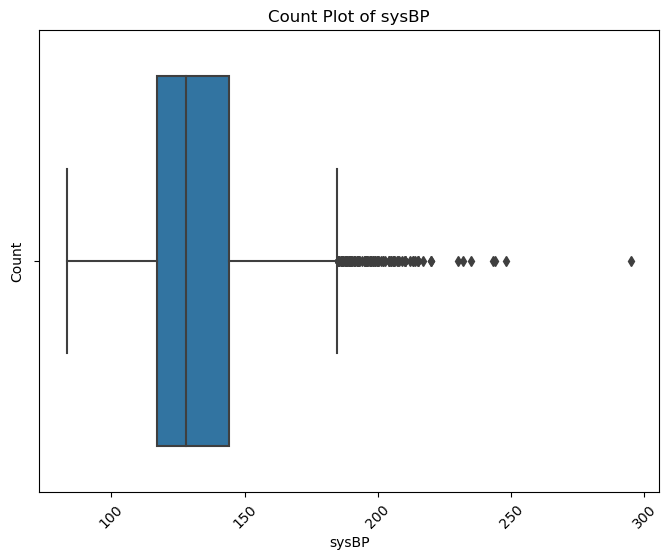

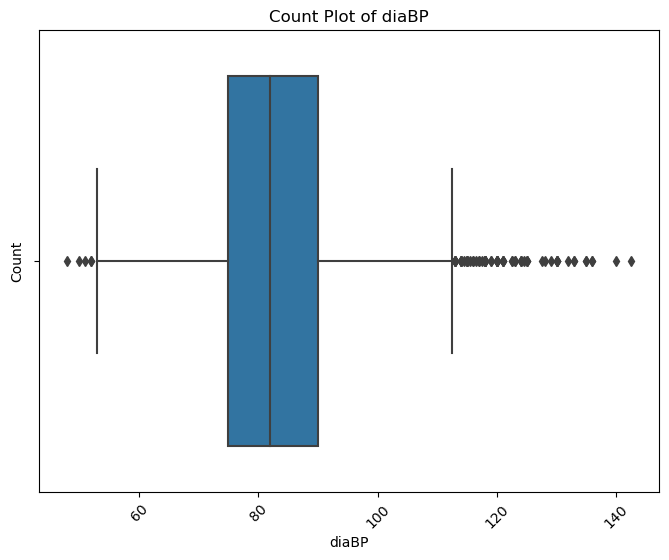

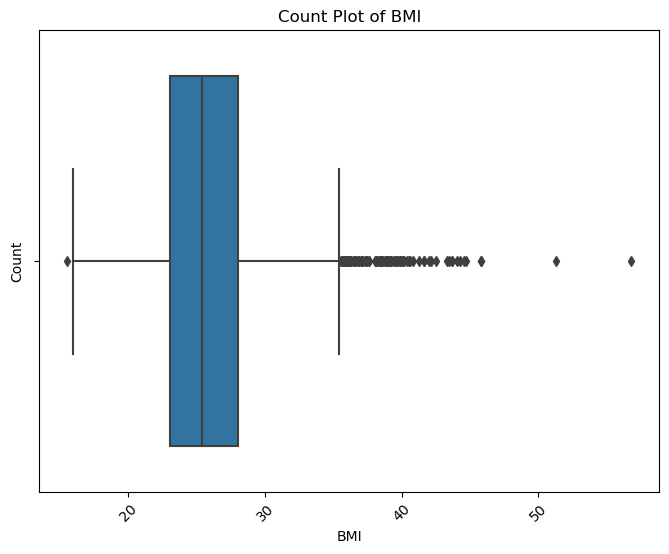

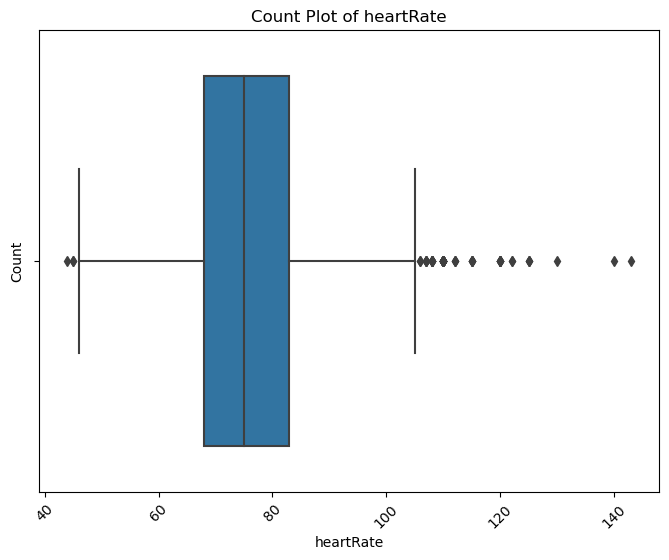

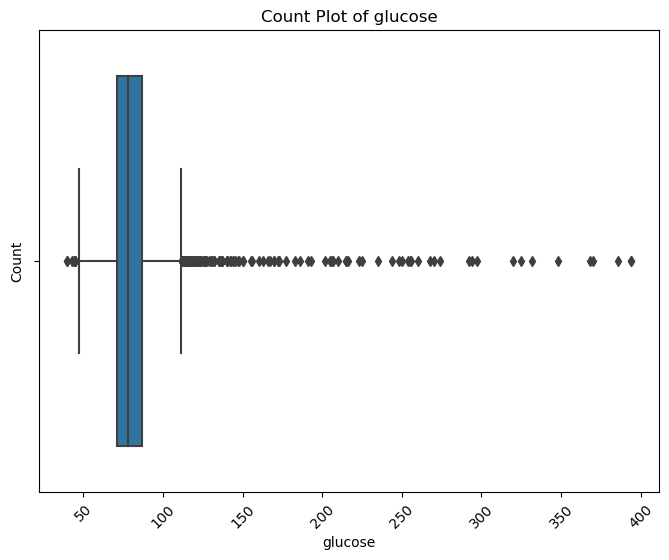

In [15]:
for var in numerical_var:
    plt.figure(figsize=(8, 6))  # Optional: Set the figure size
    sns.boxplot(x=var, data=df)
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
    plt.show()

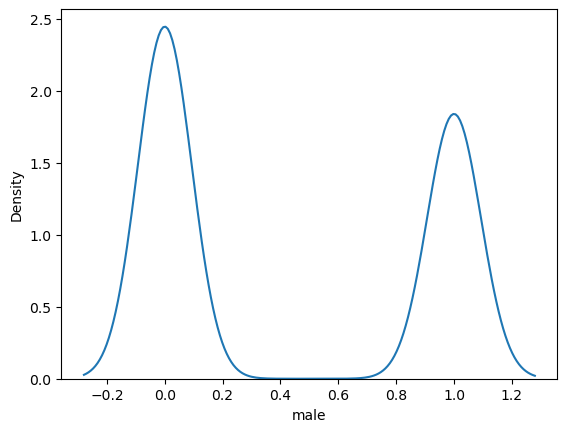

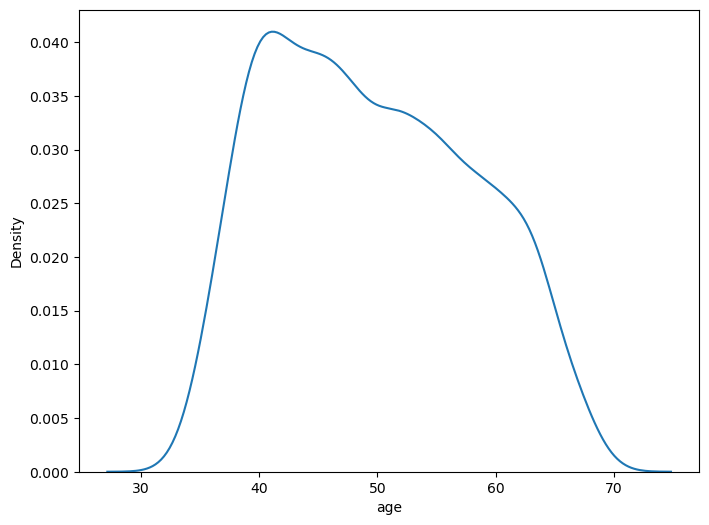

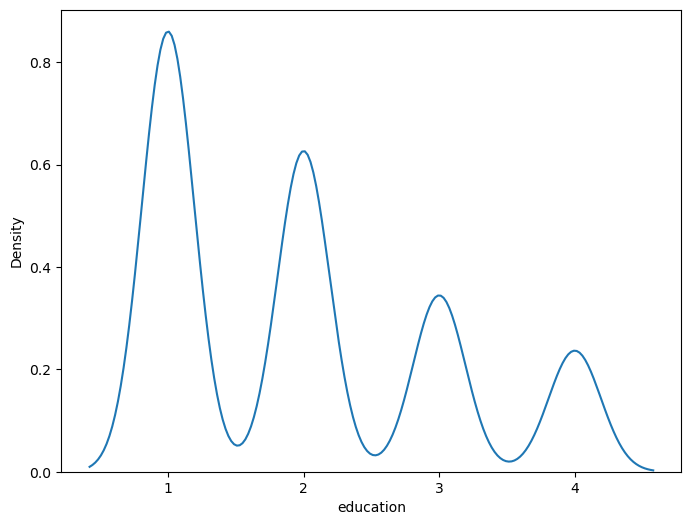

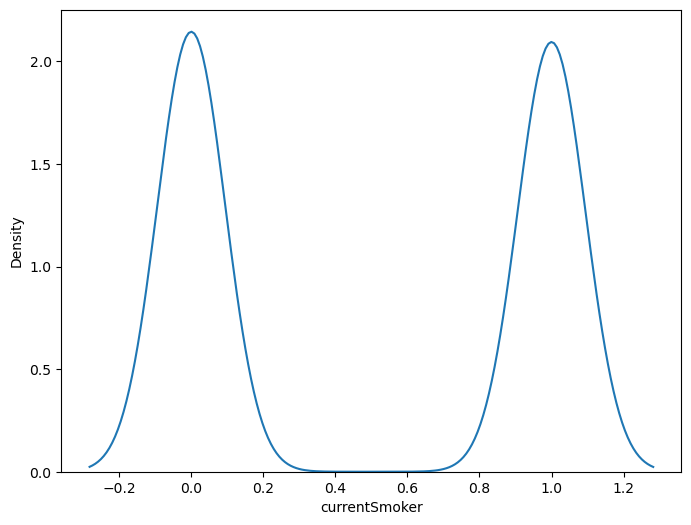

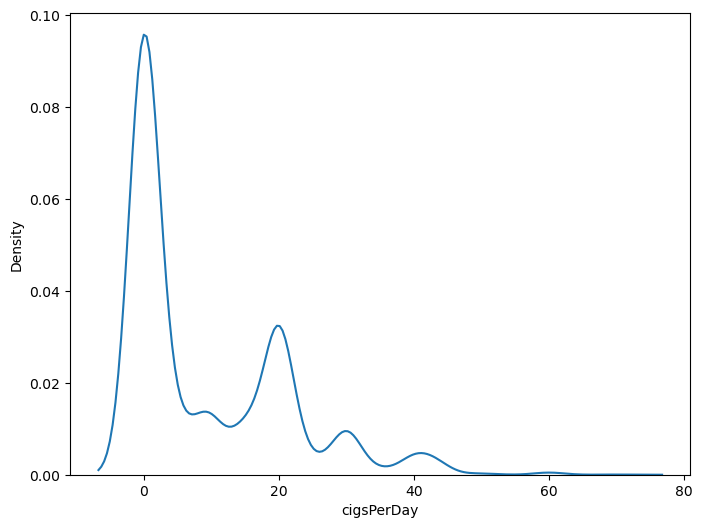

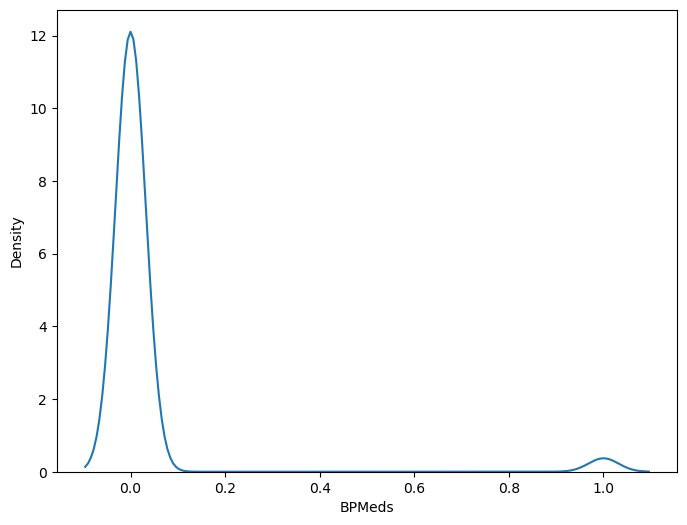

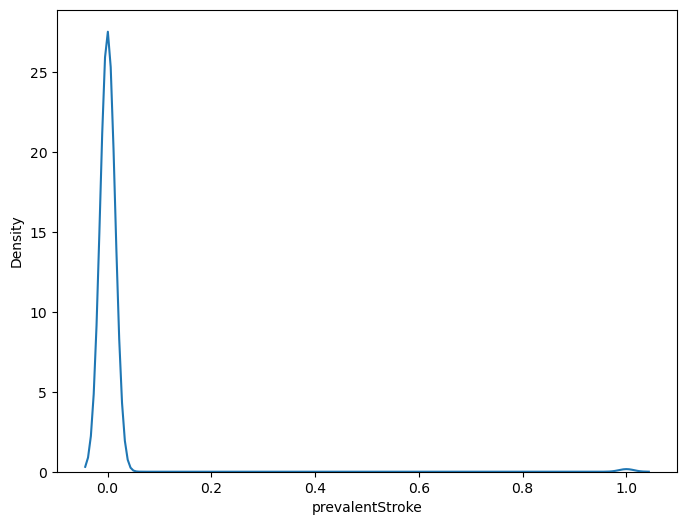

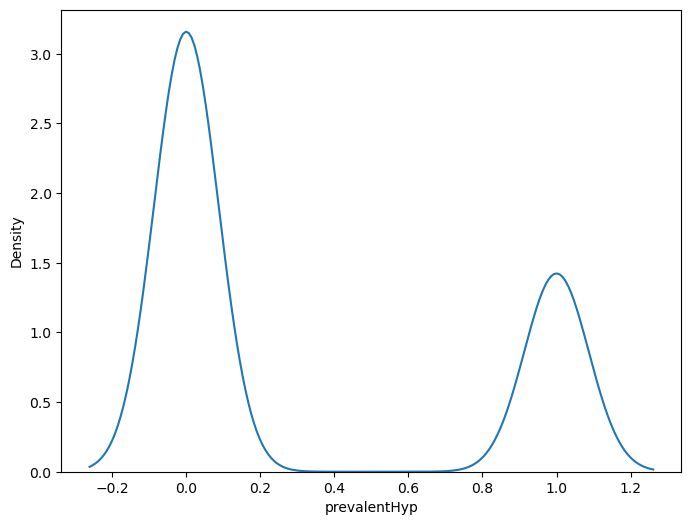

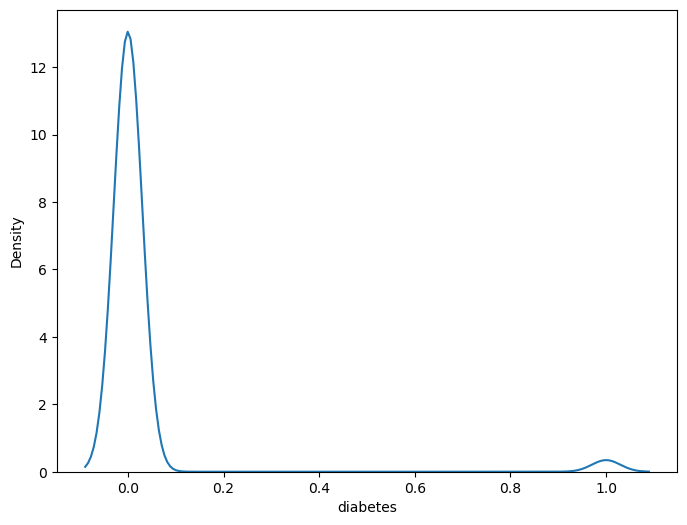

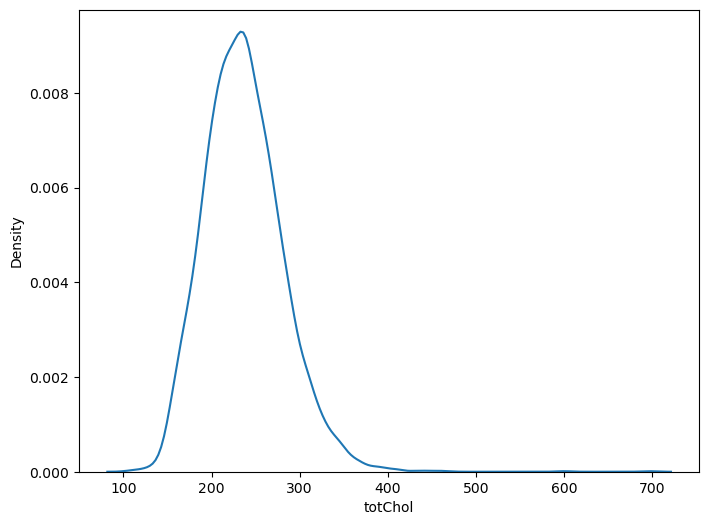

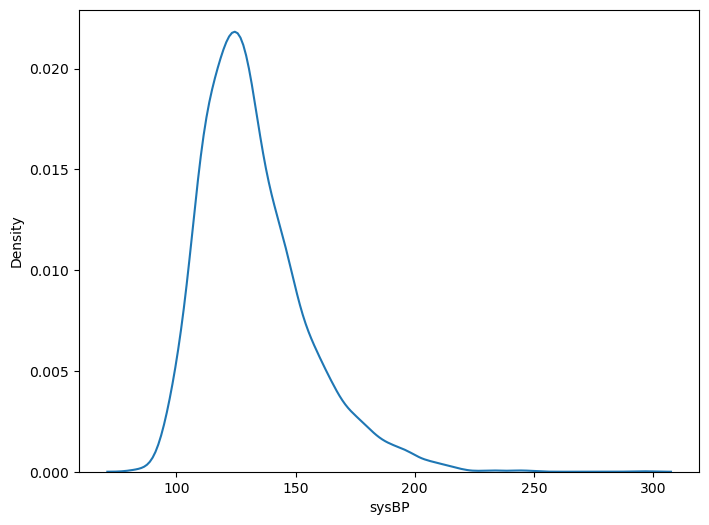

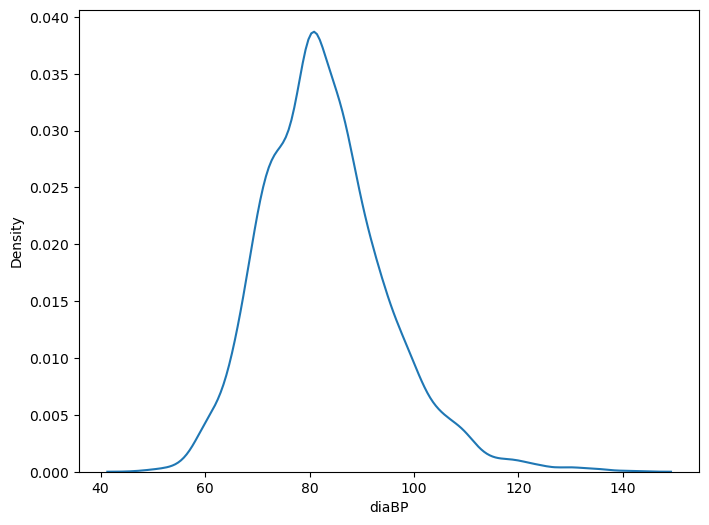

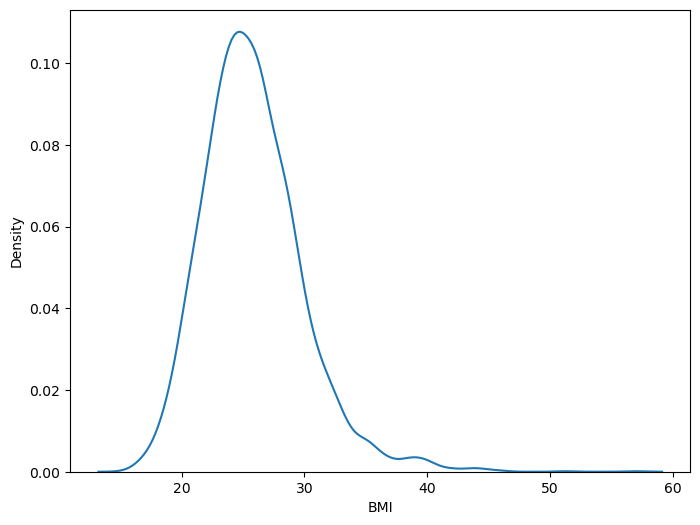

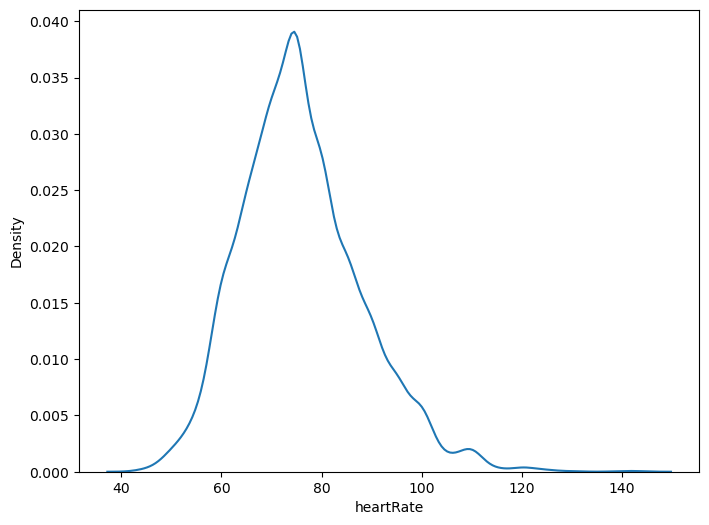

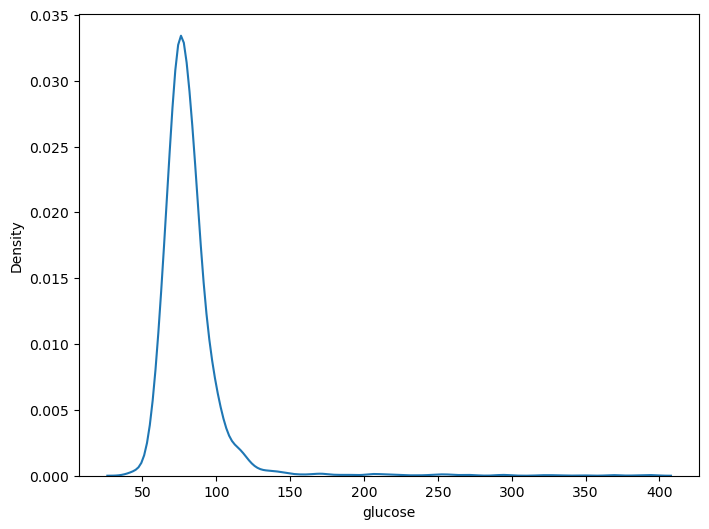

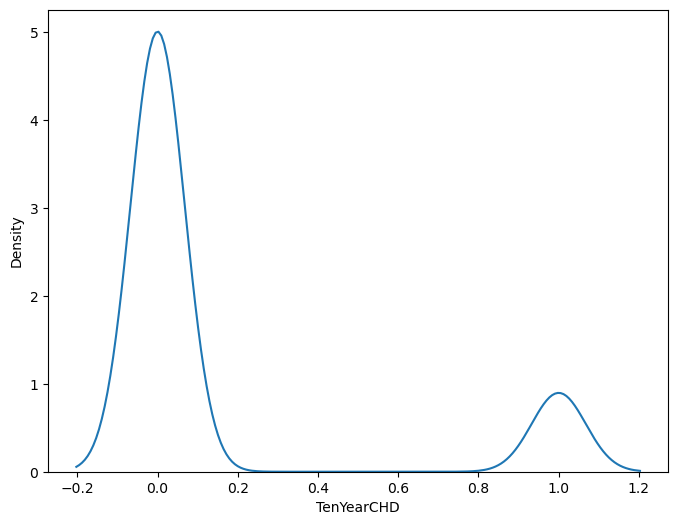

<Figure size 800x600 with 0 Axes>

In [16]:
for col_name in df.columns:
    sns.kdeplot(data = df[col_name])
    plt.figure(figsize=(8, 6))

## Data wrangling

In [14]:
#is there any null values that needed to be replaced?
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Null values will be replaced by median

In [15]:
#fillna method for, instead of a dropna
df['glucose'].fillna(df['glucose'].median(),inplace=True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [16]:
df['glucose'].isnull().sum() #checking that the replacement worked

0

In [17]:
#fillna method for, instead of a dropna
df['education'].fillna(df['education'].median(),inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(),inplace=True)
df['totChol'].fillna(df['totChol'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [18]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Criteria dependent breakdown

In [19]:
# Age range
df['age'].min(), df['age'].max()

(32, 70)

In [21]:
# Breaking age into bins of 10 years
df['age_bins'] = pd.cut(x=df['age'], bins=[30, 40, 50, 60, 70])
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_bins
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,"(30, 40]"
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,"(40, 50]"
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,"(40, 50]"
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,"(60, 70]"
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,"(40, 50]"


In [22]:
# Change the data type of age_bins to object
df['age_bins'] = df['age_bins'].astype('object')

In [23]:
# Change 30,40 to 30-40
df['age_bins'] = df['age_bins'].astype('str').str.replace('(', '').str.replace(']', '').str.replace(',', '-')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_bins
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30- 40
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40- 50
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40- 50
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60- 70
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40- 50


In [24]:
#dropping the age columns 'age','education','BPMeds', 'prevalentStroke','prevalentHyp'
df_2 = df.drop(['age','education','BPMeds', 'prevalentStroke','prevalentHyp'],axis=1)
df_2.head()

,male,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_bins
0,1,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30- 40
1,0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40- 50
2,1,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40- 50
3,0,1,30.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60- 70
4,0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40- 50


In [30]:
# Change column name
df_2.rename(columns={'male': 'gender'}, inplace=True)
df_2.head()

,gender,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_bins
0,1,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30- 40
1,0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40- 50
2,1,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40- 50
3,0,1,30.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60- 70
4,0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40- 50


In [38]:
# Replace 1, 0 values in gender with male, female
df_2['gender'] = df_2['gender'].replace({1: 'male', 0: 'female'})
df_2.head()

,gender,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_bins
0,male,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30- 40
1,female,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40- 50
2,male,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40- 50
3,female,1,30.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60- 70
4,female,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40- 50


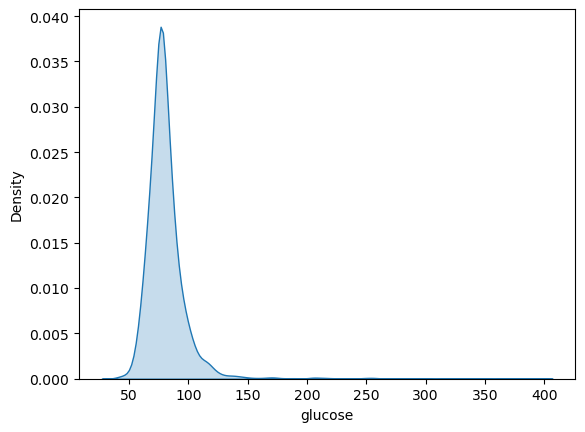

<Figure size 800x600 with 0 Axes>

In [27]:
# kdeplot for glucose by age_bins
sns.kdeplot(data=df_2['glucose'], shade=True)
plt.figure(figsize=(8, 6))
plt.show()

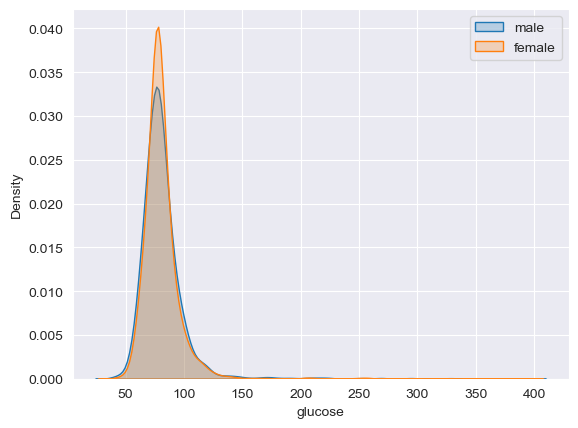

In [39]:
# sns darkgrid
sns.set_style("darkgrid")

# kdeplot for glucose by age_bins
for i in df_2['gender'].unique():
    subset = df_2[df_2['gender'] == i]
    sns.kdeplot(subset['glucose'], label=i, shade=True)
plt.legend()
plt.show()  

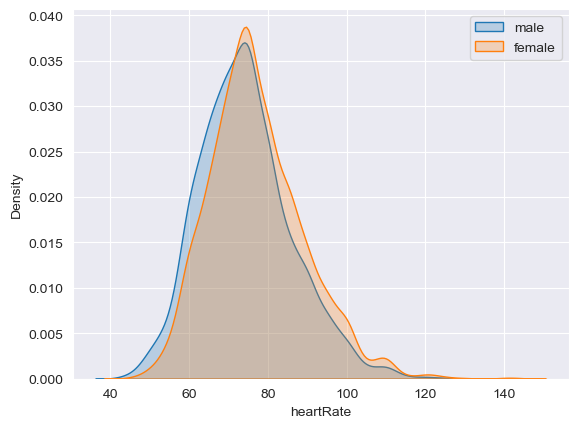

In [41]:
# sns darkgrid
sns.set_style("darkgrid")

# kdeplot for glucose by age_bins
for i in df_2['gender'].unique():
    subset = df_2[df_2['gender'] == i]
    sns.kdeplot(subset['heartRate'], label=i, shade=True)
plt.legend()
plt.show()  

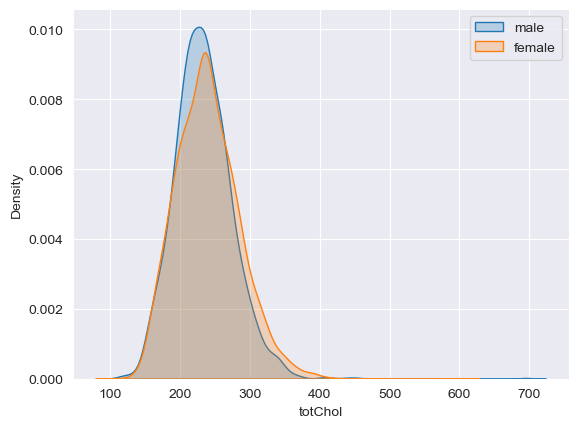

In [42]:
# sns darkgrid
sns.set_style("darkgrid")

# kdeplot for glucose by age_bins
for i in df_2['gender'].unique():
    subset = df_2[df_2['gender'] == i]
    sns.kdeplot(subset['totChol'], label=i, shade=True)
plt.legend()
plt.show()  

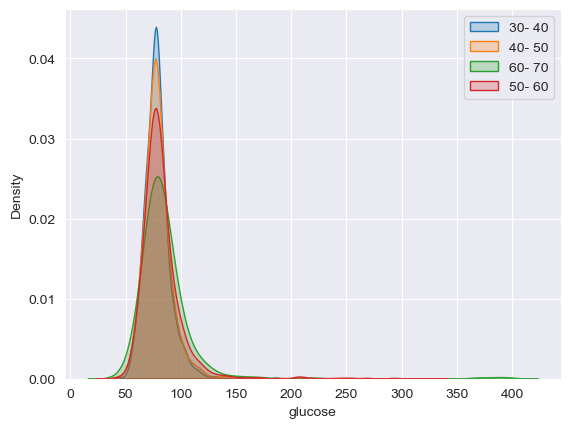

In [45]:
# sns darkgrid
sns.set_style("darkgrid")

# kdeplot for glucose by age_bins
for i in df_2['age_bins'].unique():
    subset = df_2[df_2['age_bins'] == i]
    sns.kdeplot(subset['glucose'], label=i, shade=True)
plt.legend()
plt.show()  

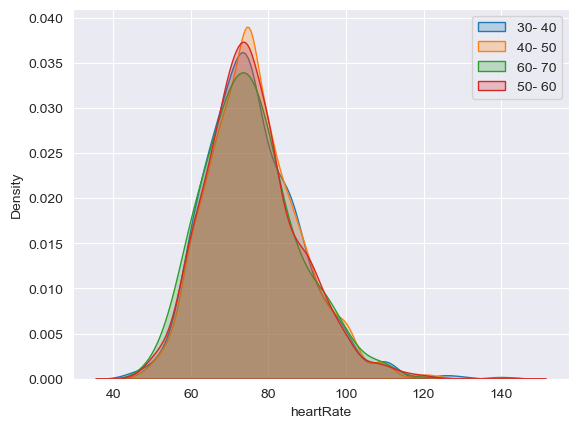

In [46]:
# sns darkgrid
sns.set_style("darkgrid")

# kdeplot for glucose by age_bins
for i in df_2['age_bins'].unique():
    subset = df_2[df_2['age_bins'] == i]
    sns.kdeplot(subset['heartRate'], label=i, shade=True)
plt.legend()
plt.show()  

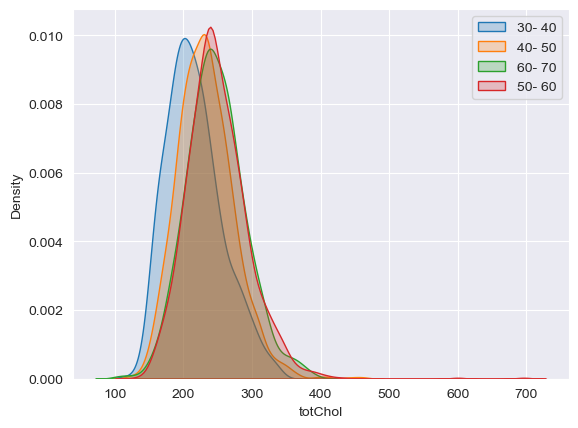

In [47]:
# sns darkgrid
sns.set_style("darkgrid")

# kdeplot for glucose by age_bins
for i in df_2['age_bins'].unique():
    subset = df_2[df_2['age_bins'] == i]
    sns.kdeplot(subset['totChol'], label=i, shade=True)
plt.legend()
plt.show()  

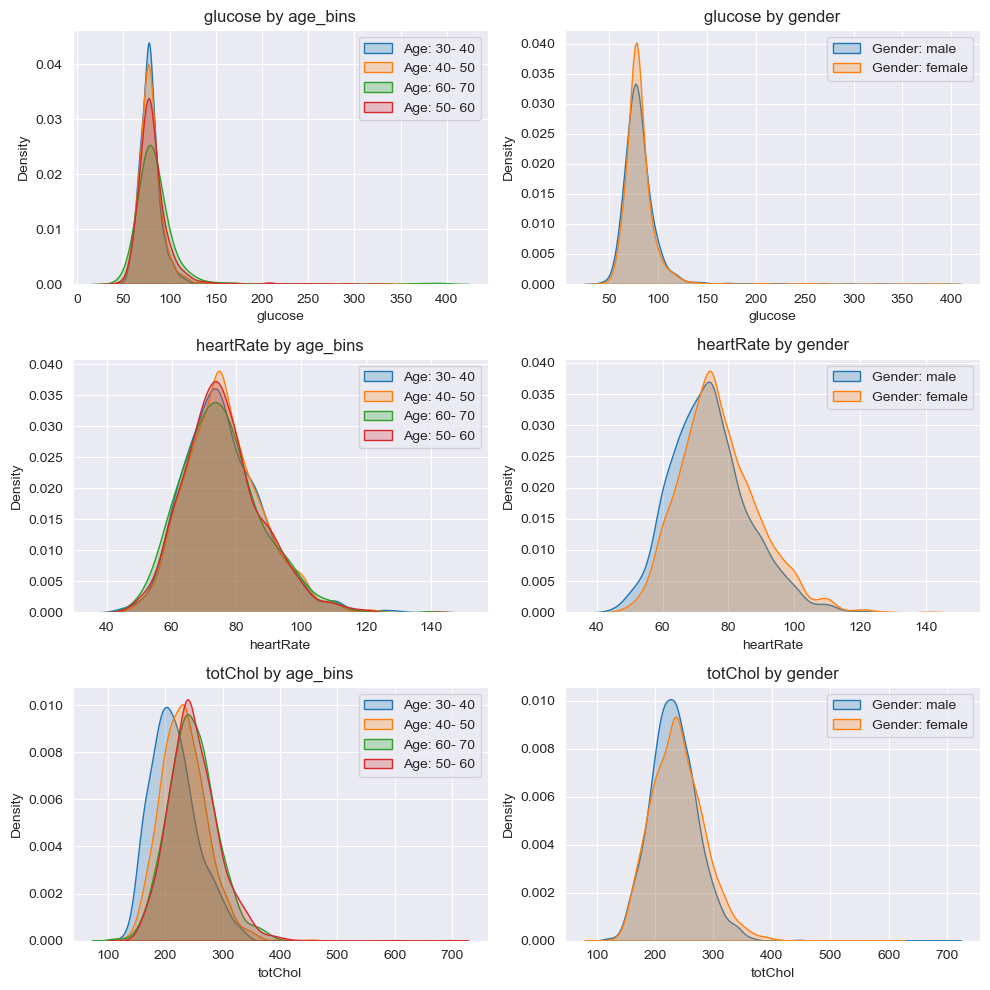

In [50]:
# Set style to darkgrid
sns.set_style("darkgrid")
fig, axarr = plt.subplots(3, 2, figsize=(10, 10))

# List of columns to plot
columns_to_plot = ['glucose', 'heartRate', 'totChol']

# Plotting by age_bins and then by gender
for idx, column in enumerate(columns_to_plot):
    # KDE plot by age_bins
    for age_bin in df_2['age_bins'].unique():
        subset = df_2[df_2['age_bins'] == age_bin]
        sns.kdeplot(subset[column], ax=axarr[idx, 0], label=f"Age: {age_bin}", shade=True)
    axarr[idx, 0].set_title(f"{column} by age_bins")
    axarr[idx, 0].legend()
    
    # KDE plot by gender
    for gender in df_2['gender'].unique():
        subset = df_2[df_2['gender'] == gender]
        sns.kdeplot(subset[column], ax=axarr[idx, 1], label=f"Gender: {gender}", shade=True)
    axarr[idx, 1].set_title(f"{column} by gender")
    axarr[idx, 1].legend()

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


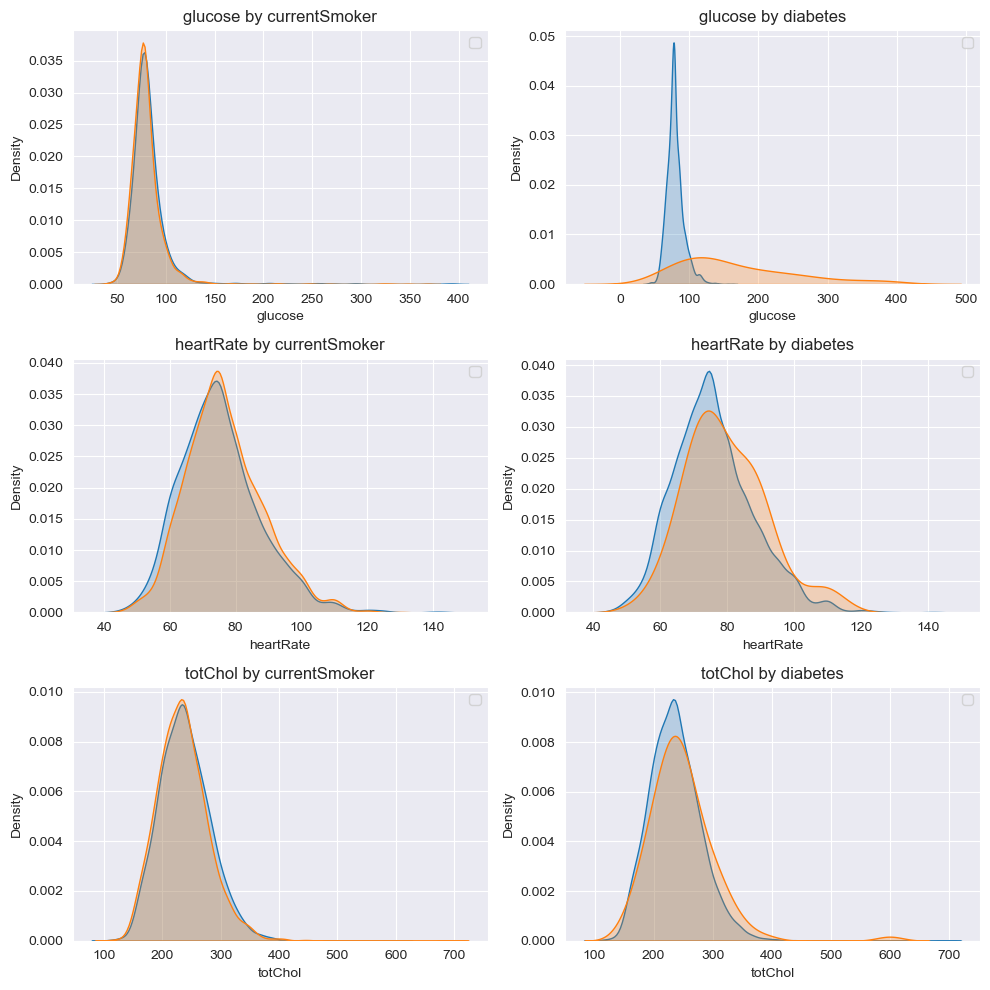

In [53]:
# Set style to darkgrid
sns.set_style("darkgrid")
fig, axarr = plt.subplots(3, 2, figsize=(10, 10))

# List of columns to plot
columns_to_plot = ['glucose', 'heartRate', 'totChol']

# Plotting by age_bins and then by gender
for idx, column in enumerate(columns_to_plot):
    # KDE plot by age_bins
    for age_bin in df_2['currentSmoker'].unique():
        subset = df_2[df_2['currentSmoker'] == age_bin]
        sns.kdeplot(subset[column], ax=axarr[idx, 0], shade=True)
    axarr[idx, 0].set_title(f"{column} by currentSmoker")
    axarr[idx, 0].legend()
    
    # KDE plot by gender
    for gender in df_2['diabetes'].unique():
        subset = df_2[df_2['diabetes'] == gender]
        sns.kdeplot(subset[column], ax=axarr[idx, 1], shade=True)
    axarr[idx, 1].set_title(f"{column} by diabetes")
    axarr[idx, 1].legend()

plt.tight_layout()
plt.show()
